In [1]:
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import models, layers

import tensorflow_hub as hub


In [2]:
## The Image shape taken in this loaded classifier is (224,224)
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

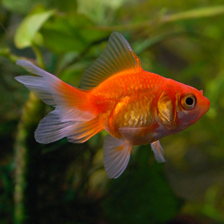

In [13]:
gold_fish = PIL.Image.open('./2_goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [15]:
# Scaled pixel value for the goldfish Image
gold_fish=np.array(gold_fish)/255.0
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [17]:
gold_fish.shape

(224, 224, 3)

In [27]:
gold_fish[np.newaxis,...].shape

(1, 224, 224, 3)

In [30]:
result = classifier.predict(gold_fish[np.newaxis])
result

1/1 [==============================] - 0s 66ms/step


array([[ 0.22101435,  2.0474904 ,  9.622562  , ..., -1.4621578 ,
        -0.28146547, -0.2598479 ]], dtype=float32)

In [37]:
result_index = np.argmax(result)
result_index

2

In [31]:
result.shape

(1, 1001)

In [36]:
image_labels=[]

with open('./2_Image_labels.txt','r') as file:
    image_labels=file.read().splitlines()
image_labels[:7]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray']

In [38]:
image_labels[result_index]

'goldfish'

<b style="color:lightgreen"><i>Working on flowers dataset</i></b>

In [39]:
data_dir = "./datasets/flower_photos/"

In [40]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [41]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [42]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [43]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

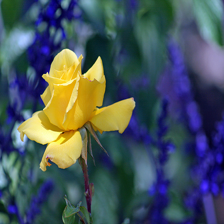

In [58]:
PIL.Image.open(str(roses[381])).resize(IMAGE_SHAPE)

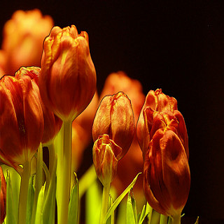

In [59]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[38])).resize(IMAGE_SHAPE)

In [51]:
flowers_img_dir_dict= {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_class_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [52]:
img = cv2.imread(str(flowers_img_dir_dict['roses'][0]))
img.shape

(240, 179, 3)

In [60]:
img = cv2.resize(img, (224,224))

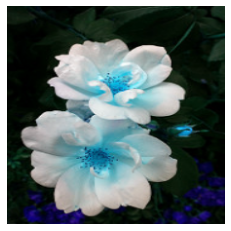

In [61]:
plt.axis('off')
plt.imshow(img)

In [62]:
x, y = [], []

for flower_name, images in flowers_img_dir_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(flowers_class_labels_dict[flower_name])

In [63]:
x= np.array(x)
y= np.array(y)

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2, stratify=y)

In [66]:
scaled_x_train = x_train/255
scaled_x_test = x_test/255

In [67]:
scaled_x_train[0].shape

(224, 224, 3)

In [84]:
x0_resized = cv2.resize(x[0], IMAGE_SHAPE)
x1_resized = cv2.resize(x[2], IMAGE_SHAPE)
x2_resized = cv2.resize(x[381], IMAGE_SHAPE)

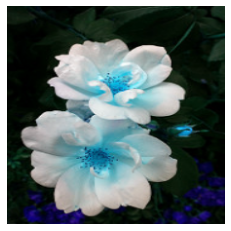

In [71]:
plt.axis('off')
plt.imshow(x0_resized)

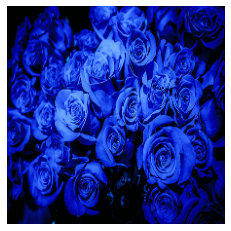

In [72]:
plt.axis('off')
plt.imshow(x1_resized)

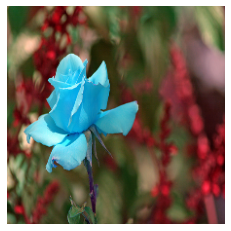

In [85]:
plt.axis('off')
plt.imshow(x2_resized)

In [86]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 170ms/step


array([795, 795, 795], dtype=int64)

In [88]:
labels = [image_labels[i] for i in predicted]
labels

['shower curtain', 'shower curtain', 'shower curtain']

In [89]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_last_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [90]:
model = models.Sequential([
  pretrained_model_without_last_layer,
  layers.Dense(5, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [91]:
model.compile(
  optimizer="adam",
  loss='sparse_categorical_crossentropy',
  metrics=['acc'])

model.fit(scaled_x_train, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 380s 933ms/step - loss: 0.7969 - acc: 0.6986
Epoch 2/5
92/92 [==============================] - 60s 645ms/step - loss: 0.4083 - acc: 0.8621
Epoch 3/5
92/92 [==============================] - 87s 951ms/step - loss: 0.3178 - acc: 0.8913
Epoch 4/5
92/92 [==============================] - 97s 1s/step - loss: 0.2649 - acc: 0.9121
Epoch 5/5
92/92 [==============================] - 100s 1s/step - loss: 0.2266 - acc: 0.9322


In [92]:
model.evaluate(scaled_x_test, y_test)

23/23 [==============================] - 55s 763ms/step - loss: 0.3960 - acc: 0.8569


[0.39603379368782043, 0.8569482564926147]